# Exercise 1
In this task, you will have to solve the problem of image classification – to separate images of cats from images of dogs, using a classification with a soft gap and the parameter C.  

The proposed archive contains a selection that includes images of cats and dogs (500 images each). The name of each image, for convenience, has the following format: cat/dog.image_number.jpg depending on which animal is present in the image. This sample is used to train the classifier and evaluate the classifier.

В данной задаче вам предстоит решить задачу классификации изображений – отделить изображения кошек от изображений собак, используя классификацию с мягким зазором и параметром C.  

В предложенном архиве находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  cat/dog.номер_изображения.jpg  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.

In [1]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.0 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.0 which is incompatible.


In [2]:
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [3]:
import os

def load_data(data_dir, link):
  if not (os.path.exists(data_dir)):
    print('========= Downloading data ... =========')
    os.system('wget ' + link + ' -O ' + data_dir + '.zip')
    os.system('unzip ' + data_dir + '.zip' + ' -d ' + data_dir)
    os.system('rm -rf ' + data_dir + '/__MACOSX')
    os.system('rm ' + data_dir + '.zip')
    print('=========       Success        =========')
  else:
    print('========= Data is already dowloaded =========')

In [4]:
data_dir1 = '/content/train'
link1 = 'https://github.com/Mark1708/ml-and-ds-online-course/raw/main/data/ensembles/train.zip'
load_data(data_dir1, link1)

========= Downloading data ... =========
=========       Success        =========


In [5]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [6]:
imagePaths = sorted(list(paths.list_images('train')))
trainData = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    trainData.append(hist)
    labels.append(label)

In [7]:
Y = [1 if x == 'cat' else 0 for x in labels]

1


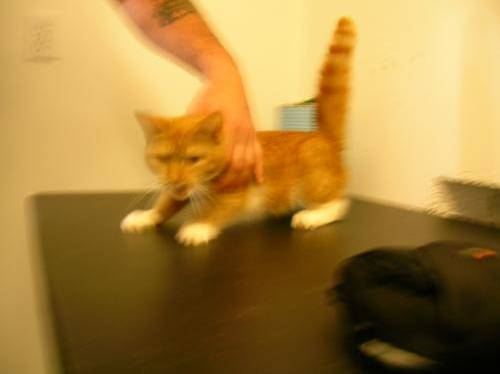

In [8]:
print(Y[0])
Image(filename=imagePaths[0])

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=2020)
bagging = BaggingClassifier(tree, #базовый алгоритм
                            n_estimators=19, #количество деревьев
                            random_state=462)
bagging.fit(trainData, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=2020),
                  n_estimators=19, random_state=462)

In [10]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state = 462, C = 1.09)
svm.fit(trainData, Y)

LinearSVC(C=1.09, random_state=462)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=19, #количество деревьев
                             criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=462)
forest.fit(trainData, Y)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=19, random_state=462)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=462)

In [13]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=lr, cv=2)
sclf.fit(trainData, Y)

StackingClassifier(cv=2,
                   estimators=[('SVM', LinearSVC(C=1.09, random_state=462)),
                               ('Bagging DT',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=2020),
                                                  n_estimators=19,
                                                  random_state=462)),
                               ('DecisionForest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
      

Evaluation of the meta-model. The proportion of correct classification (Accuracy):

Оценка метамодели. Доля правильной классификации (Accuracy):

In [14]:
round(sclf.score(trainData, Y), 2)

0.84

Make a prediction for the images listed below and determine the probability of assigning the images to Class 1 (cat) using a trained meta-algorithm. Round up the answers to thousandths.

Выполните предсказание для изображений, указанных ниже и определите вероятность отнесения изображений к классу 1 (cat) с помощью обученного метаалгоритма. Ответы округлите до тысячных.

In [15]:
data_dir2 = '/content/test'
link2 = 'https://github.com/Mark1708/ml-and-ds-online-course/raw/main/data/ensembles/test.zip'
load_data(data_dir2, link2)

========= Downloading data ... =========
=========       Success        =========


In [16]:
imagePaths = sorted(list(paths.list_images('test')))
predictions = {}
predict_probas = {}

for (i, imagePath) in enumerate(imagePaths):
  singleImage = cv2.imread(imagePath)
  histt = extract_histogram(singleImage)
  histt2 = histt.reshape(1, -1)
  predictions[imagePath.split('/')[1]] = sclf.predict(histt2)
  predict_probas[imagePath.split('/')[1]] = sclf.predict_proba(histt2)

In [17]:
def printResult(name):
  print('Class: ' + str(predictions[name][0]))
  print('Probas for class - 1: ' + str(round(predict_probas[name][0][1], 3)))
  display(Image(filename='test/' + name, width=200))

Class: 0
Probas for class - 1: 0.351


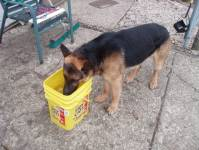

In [18]:
printResult('dog.1023.jpg')

Class: 0
Probas for class - 1: 0.272


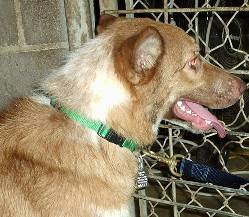

In [19]:
printResult('dog.1029.jpg')

Class: 0
Probas for class - 1: 0.376


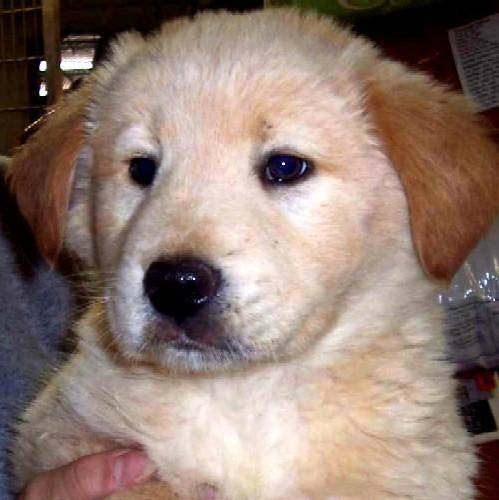

In [20]:
printResult('dog.1006.jpg')

Class: 0
Probas for class - 1: 0.416


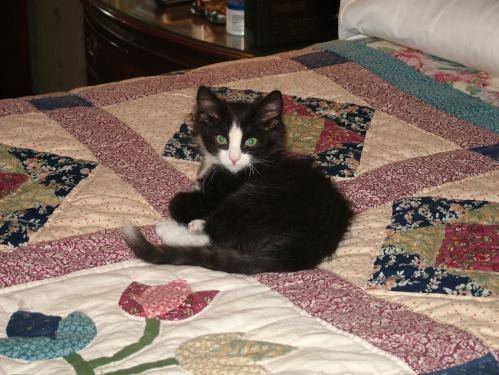

In [21]:
printResult('cat.1004.jpg')